In [7]:
# generate and plot a synthetic imbalnced classification dataset
from collections import Counter
from sklearn.datasets import make_classification

In [8]:
## imbalnced classification dataset
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99],  random_state=10)


In [9]:
X

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [12]:
counter = Counter(y)
counter

Counter({0: 9846, 1: 154})

<Axes: >

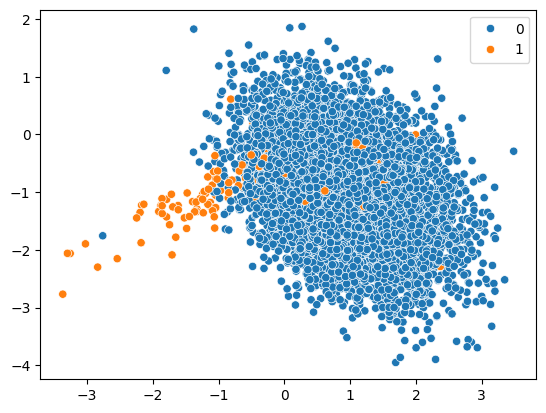

In [14]:
import seaborn as sns
import pandas as pd

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [15]:
# split into train/test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

In [16]:
# hyperparameter tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2','elasticnet']
c_vales= [0.001, 0.01, 0.1, 1, 10, 100, 1000]
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]


In [22]:
params= dict(penalty=penalty, C=c_vales, solver=solver, class_weight=class_weight)

In [23]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv= StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, cv=cv, n_jobs=-1,scoring='accuracy')

In [25]:
grid.fit(X_train, y_train)

c:\Users\gurah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
4480 fits failed out of a total of 8400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\gurah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\gurah\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\gurah\A

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [26]:
grid.best_params_

{'C': 0.01,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [27]:
grid.best_score_

0.9874

In [28]:
y_pred = grid.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)




0.9898

In [30]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4925   11]
 [  40   24]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4936
           1       0.69      0.38      0.48        64

    accuracy                           0.99      5000
   macro avg       0.84      0.69      0.74      5000
weighted avg       0.99      0.99      0.99      5000

